In [35]:
# Dependencies
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Reference to the file
path = Path("./Resources/market.sqlite")

In [12]:
engine = create_engine(f"sqlite:///{path}")
connection = engine.connect()

In [14]:
data = pd.read_sql("SELECT * FROM market", connection)
data.head()

,?,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,,72.28,,3.8215,,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0000000005,171.81,117220000.0,474.99,84710000.0,"2,053.70",
1,1,01-02-2024,2.05,161340.0,73.82,577940.0,3.8535,,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.00000000003
2,2,31-01-2024,2.1,142860.0,75.85,344490.0,3.906,,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.2,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.911,,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.0,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.49,3590.0,76.78,331930.0,3.879,,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [20]:
data.dtypes

?                    object
Date                 object
Natural_Gas_Price    object
Natural_Gas_Vol.     object
Crude_oil_Price      object
Crude_oil_Vol.       object
Copper_Price         object
Copper_Vol.          object
Bitcoin_Price        object
Bitcoin_Vol.         object
Platinum_Price       object
Platinum_Vol.        object
Ethereum_Price       object
Ethereum_Vol.        object
S&P_500_Price        object
Nasdaq_100_Price     object
Nasdaq_100_Vol.      object
Apple_Price          object
Apple_Vol.           object
Tesla_Price          object
Tesla_Vol.           object
Microsoft_Price      object
Microsoft_Vol.       object
Silver_Price         object
Silver_Vol.          object
Google_Price         object
Google_Vol.          object
Nvidia_Price         object
Nvidia_Vol.          object
Berkshire_Price      object
Berkshire_Vol.       object
Netflix_Price        object
Netflix_Vol.         object
Amazon_Price         object
Amazon_Vol.          object
Meta_Price          

In [22]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [23]:
data.columns

Index(['?', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

# Amazon Stock Prices/Volume
    2/4/2019 - 2/2/2024

In [29]:
amazon_df = data.drop(columns= ['?','Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'])

amazon_df['Amazon_Price'] = pd.to_numeric(amazon_df['Amazon_Price'])
amazon_df['Amazon_Vol.'] = pd.to_numeric(amazon_df['Amazon_Vol.'])

amazon_df.head()

,Date,Amazon_Price,Amazon_Vol.
0,2024-02-02,171.81,117220000.0
1,2024-02-01,159.28,66360000.0
2,2024-01-31,155.20,49690000.0
3,2024-01-30,159.00,42290000.0
4,2024-01-29,161.26,42840000.0


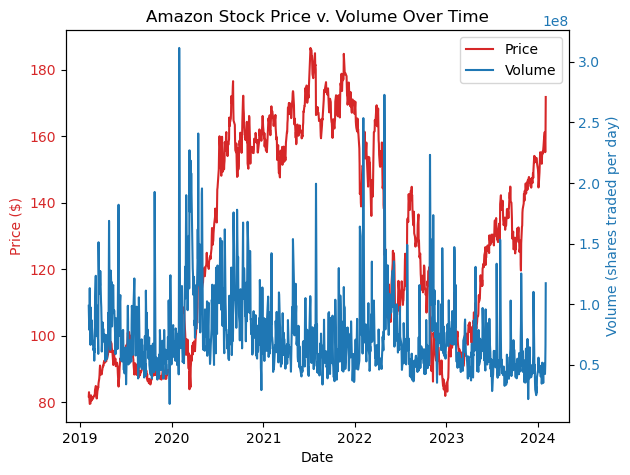

In [46]:
amazon_date = amazon_df['Date']
amazon_price = amazon_df['Amazon_Price']
amazon_vol = amazon_df['Amazon_Vol.']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date, amazon_price, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date, amazon_vol, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

fig.tight_layout()
plt.title('Amazon Stock Price v. Volume Over Time')
plt.show()

<Figure size 3000x400 with 0 Axes>

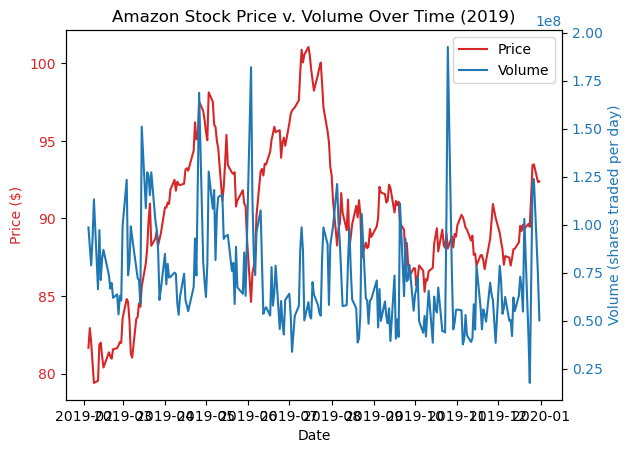

In [87]:
amazon_df_2019 = amazon_df.loc[amazon_df['Date'].dt.year < 2020]

amazon_date_2019 = amazon_df_2019['Date']
amazon_price_2019 = amazon_df_2019['Amazon_Price']
amazon_vol_2019 = amazon_df_2019['Amazon_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date_2019, amazon_price_2019, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date_2019, amazon_vol_2019, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Amazon Stock Price v. Volume Over Time (2019)')
plt.show()

Text(0.5, 1.0, 'Amazon Stock Price v. Volume Over Time (2020)')

<Figure size 3000x400 with 0 Axes>

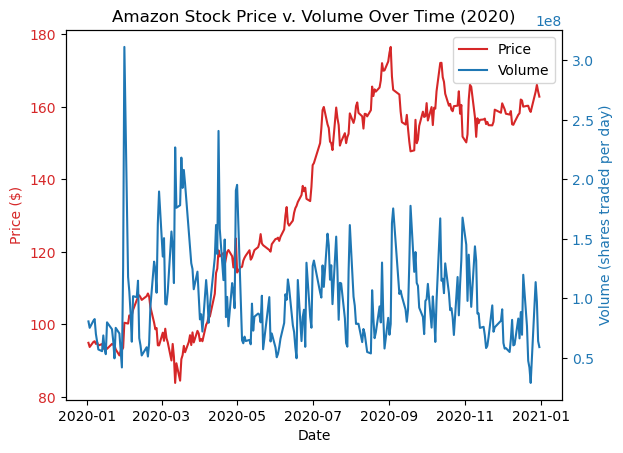

In [89]:
amazon_df_2020 = amazon_df.loc[(amazon_df['Date'].dt.year < 2021) & (amazon_df['Date'].dt.year > 2019)]

amazon_date_2020 = amazon_df_2020['Date']
amazon_price_2020 = amazon_df_2020['Amazon_Price']
amazon_vol_2020 = amazon_df_2020['Amazon_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date_2020, amazon_price_2020, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date_2020, amazon_vol_2020, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Amazon Stock Price v. Volume Over Time (2020)')
plt.show()

<Figure size 3000x400 with 0 Axes>

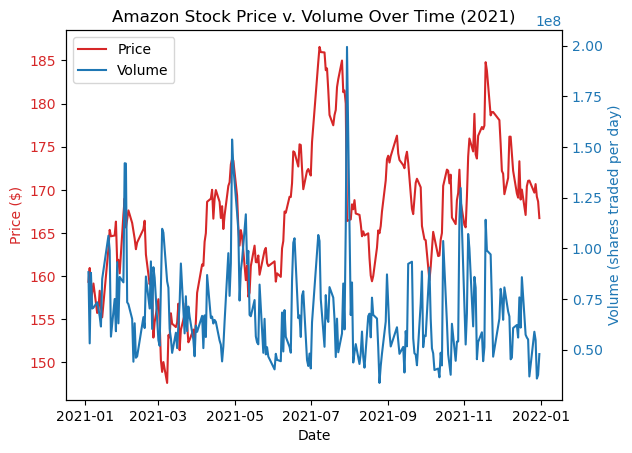

In [90]:
amazon_df_2021 = amazon_df.loc[(amazon_df['Date'].dt.year < 2022) & (amazon_df['Date'].dt.year > 2020)]

amazon_date_2021 = amazon_df_2021['Date']
amazon_price_2021 = amazon_df_2021['Amazon_Price']
amazon_vol_2021 = amazon_df_2021['Amazon_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date_2021, amazon_price_2021, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date_2021, amazon_vol_2021, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Amazon Stock Price v. Volume Over Time (2021)')
plt.show()

<Figure size 3000x400 with 0 Axes>

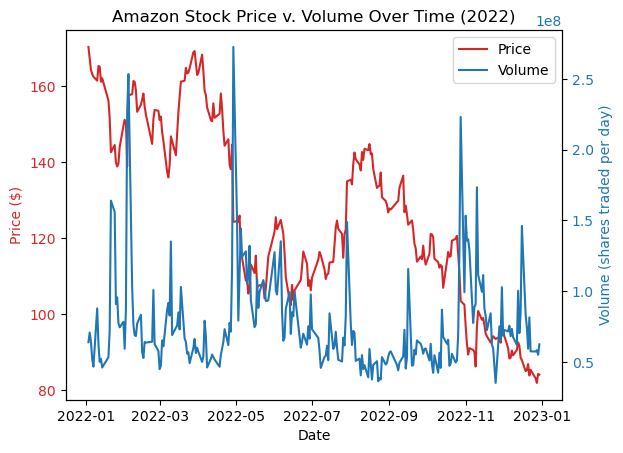

In [91]:
amazon_df_2022 = amazon_df.loc[(amazon_df['Date'].dt.year < 2023) & (amazon_df['Date'].dt.year > 2021)]

amazon_date_2022 = amazon_df_2022['Date']
amazon_price_2022 = amazon_df_2022['Amazon_Price']
amazon_vol_2022 = amazon_df_2022['Amazon_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date_2022, amazon_price_2022, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date_2022, amazon_vol_2022, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Amazon Stock Price v. Volume Over Time (2022)')
plt.show()

<Figure size 3000x400 with 0 Axes>

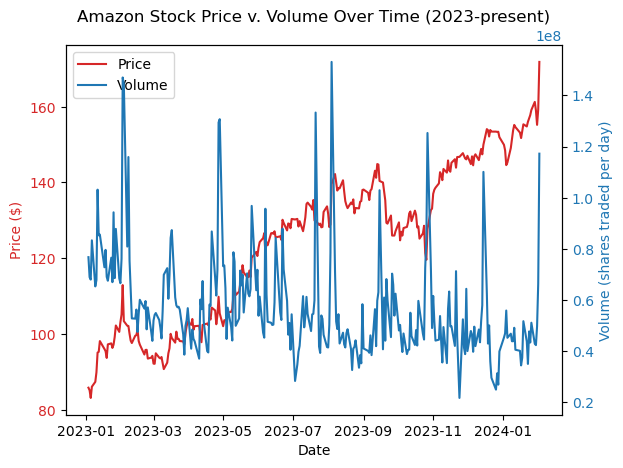

In [92]:
amazon_df_2023 = amazon_df.loc[amazon_df['Date'].dt.year > 2022]

amazon_date_2023 = amazon_df_2023['Date']
amazon_price_2023 = amazon_df_2023['Amazon_Price']
amazon_vol_2023 = amazon_df_2023['Amazon_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(amazon_date_2023, amazon_price_2023, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(amazon_date_2023, amazon_vol_2023, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Amazon Stock Price v. Volume Over Time (2023-present)')
plt.show()

# Google Stock Prices/Volume
    2/4/2019 - 2/2/2024

In [44]:
google_df = data.drop(columns= ['?','Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'])

google_df['Google_Price'] = pd.to_numeric(google_df['Google_Price'])
google_df['Google_Vol.'] = pd.to_numeric(google_df['Google_Vol.'])

google_df.head()

,Date,Google_Price,Google_Vol.
0,2024-02-02,142.38,62500000.0
1,2024-02-01,141.16,37120000.0
2,2024-01-31,140.10,71370000.0
3,2024-01-30,151.46,33060000.0
4,2024-01-29,153.51,27590000.0


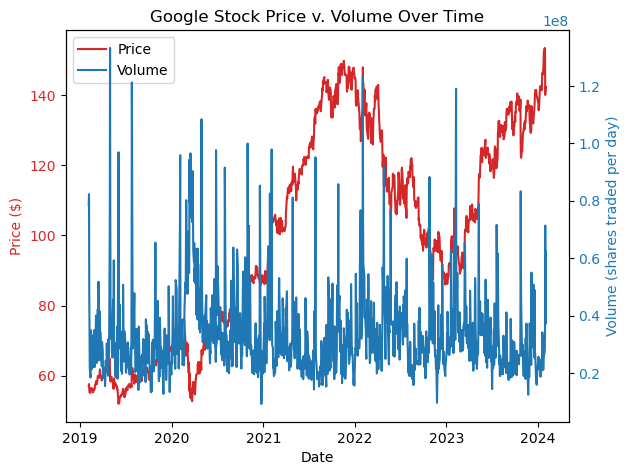

In [47]:
google_date = google_df['Date']
google_price = google_df['Google_Price']
google_vol = google_df['Google_Vol.']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date, google_price, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date, google_vol, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

fig.tight_layout()
plt.title('Google Stock Price v. Volume Over Time')
plt.show()

<Figure size 3000x400 with 0 Axes>

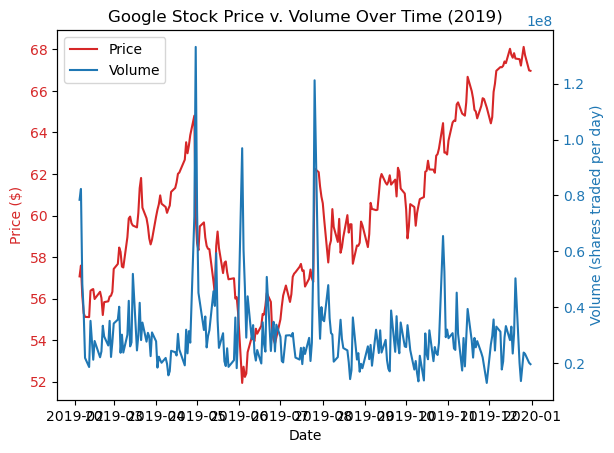

In [95]:
google_df_2019 = google_df.loc[google_df['Date'].dt.year < 2020]

google_date_2019 = google_df_2019['Date']
google_price_2019 = google_df_2019['Google_Price']
google_vol_2019 = google_df_2019['Google_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date_2019, google_price_2019, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date_2019, google_vol_2019, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Google Stock Price v. Volume Over Time (2019)')
plt.show()

<Figure size 3000x400 with 0 Axes>

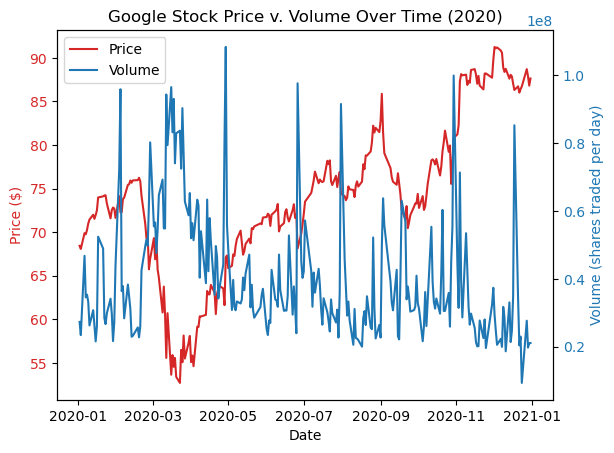

In [96]:
google_df_2020 = google_df.loc[(google_df['Date'].dt.year < 2021) & (google_df['Date'].dt.year > 2019)]

google_date_2020 = google_df_2020['Date']
google_price_2020 = google_df_2020['Google_Price']
google_vol_2020 = google_df_2020['Google_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date_2020, google_price_2020, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date_2020, google_vol_2020, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Google Stock Price v. Volume Over Time (2020)')
plt.show()

<Figure size 3000x400 with 0 Axes>

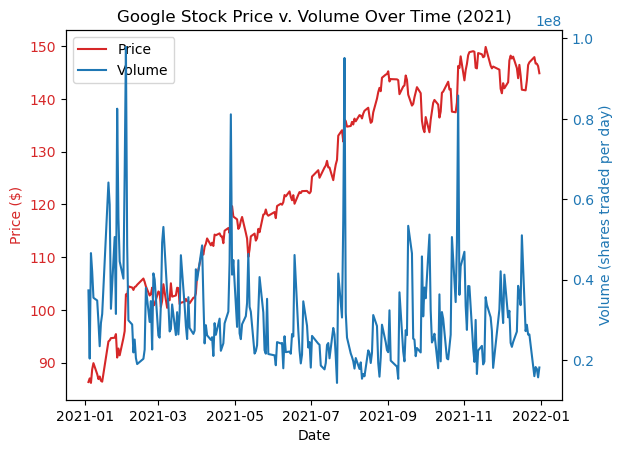

In [97]:
google_df_2021 = google_df.loc[(google_df['Date'].dt.year < 2022) & (google_df['Date'].dt.year > 2020)]

google_date_2021 = google_df_2021['Date']
google_price_2021 = google_df_2021['Google_Price']
google_vol_2021 = google_df_2021['Google_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date_2021, google_price_2021, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date_2021, google_vol_2021, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Google Stock Price v. Volume Over Time (2021)')
plt.show()

<Figure size 3000x400 with 0 Axes>

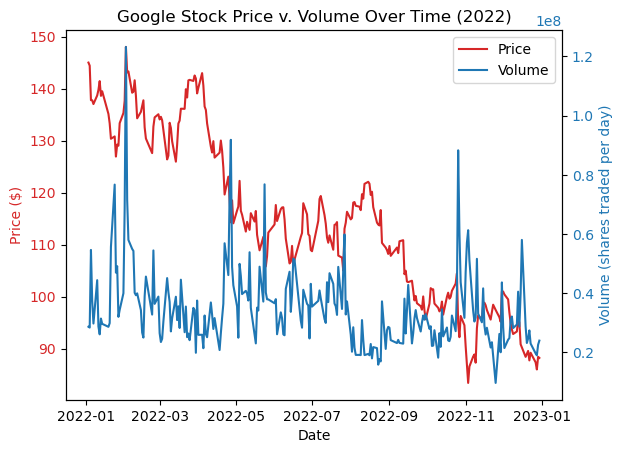

In [98]:
google_df_2022 = google_df.loc[(google_df['Date'].dt.year < 2023) & (google_df['Date'].dt.year > 2021)]

google_date_2022 = google_df_2022['Date']
google_price_2022 = google_df_2022['Google_Price']
google_vol_2022 = google_df_2022['Google_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date_2022, google_price_2022, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date_2022, google_vol_2022, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Google Stock Price v. Volume Over Time (2022)')
plt.show()

<Figure size 3000x400 with 0 Axes>

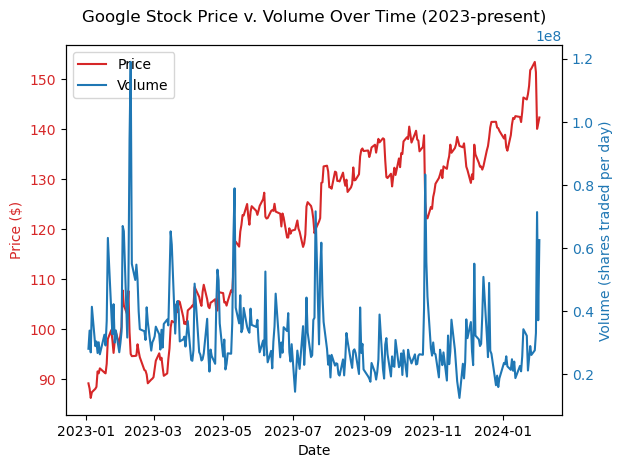

In [99]:
google_df_2023 = google_df.loc[google_df['Date'].dt.year > 2022]

google_date_2023 = google_df_2023['Date']
google_price_2023 = google_df_2023['Google_Price']
google_vol_2023 = google_df_2023['Google_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(google_date_2023, google_price_2023, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(google_date_2023, google_vol_2023, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Google Stock Price v. Volume Over Time (2023-present)')
plt.show()

# Apple Stock Prices/Volume
    2/4/2019 - 2/2/2024

In [49]:
apple_df = data.drop(columns= ['?','Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'])

apple_df['Apple_Price'] = pd.to_numeric(apple_df['Apple_Price'])
apple_df['Apple_Vol.'] = pd.to_numeric(apple_df['Apple_Vol.'])

apple_df.head()

,Date,Apple_Price,Apple_Vol.
0,2024-02-02,185.85,102550000.0
1,2024-02-01,186.86,53490000.0
2,2024-01-31,184.40,54830000.0
3,2024-01-30,188.04,55270000.0
4,2024-01-29,191.73,46890000.0


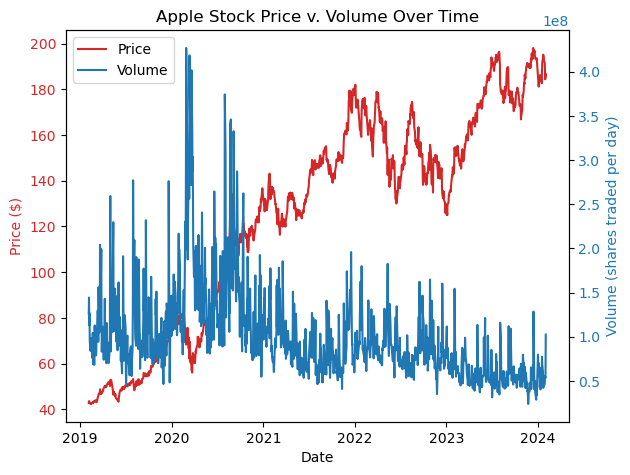

In [50]:
apple_date = apple_df['Date']
apple_price = apple_df['Apple_Price']
apple_vol = apple_df['Apple_Vol.']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date, apple_price, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date, apple_vol, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

fig.tight_layout()
plt.title('Apple Stock Price v. Volume Over Time')
plt.show()

<Figure size 3000x400 with 0 Axes>

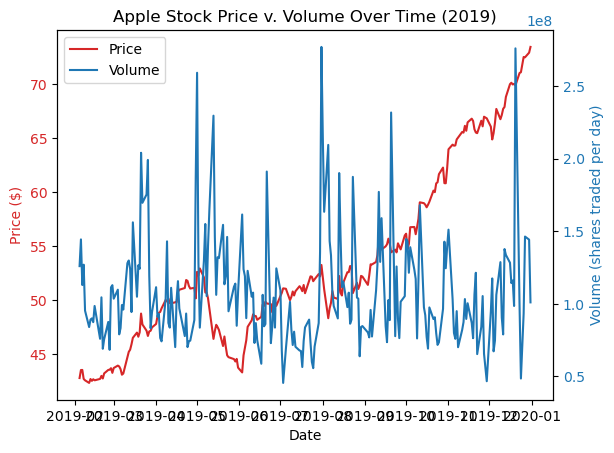

In [100]:
apple_df_2019 = apple_df.loc[apple_df['Date'].dt.year < 2020]

apple_date_2019 = apple_df_2019['Date']
apple_price_2019 = apple_df_2019['Apple_Price']
apple_vol_2019 = apple_df_2019['Apple_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date_2019, apple_price_2019, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date_2019, apple_vol_2019, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Apple Stock Price v. Volume Over Time (2019)')
plt.show()

<Figure size 3000x400 with 0 Axes>

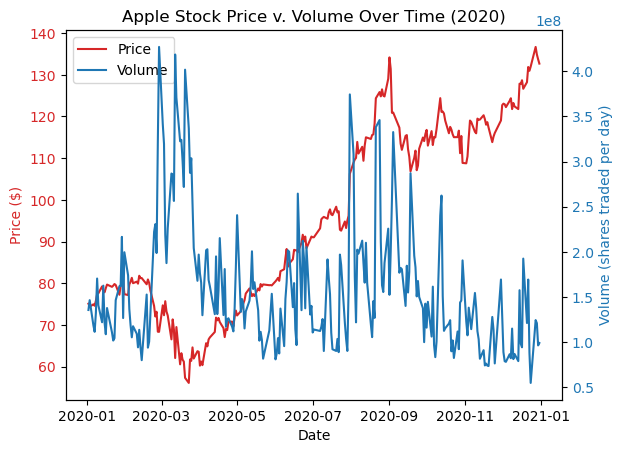

In [102]:
apple_df_2020 = apple_df.loc[(apple_df['Date'].dt.year < 2021) & (apple_df['Date'].dt.year > 2019)]

apple_date_2020 = apple_df_2020['Date']
apple_price_2020 = apple_df_2020['Apple_Price']
apple_vol_2020 = apple_df_2020['Apple_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date_2020, apple_price_2020, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date_2020, apple_vol_2020, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Apple Stock Price v. Volume Over Time (2020)')
plt.show()

<Figure size 3000x400 with 0 Axes>

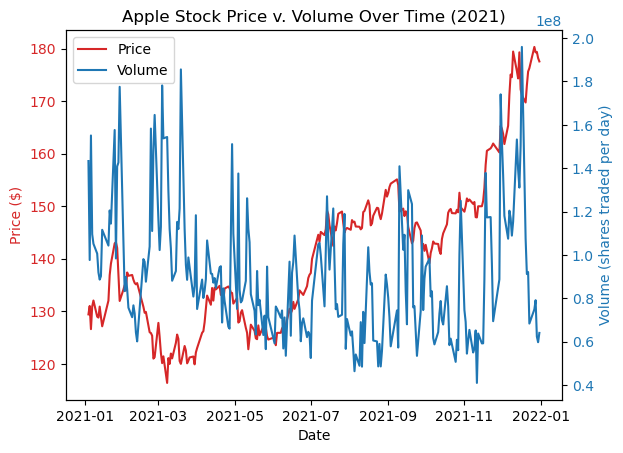

In [103]:
apple_df_2021 = apple_df.loc[(apple_df['Date'].dt.year < 2022) & (apple_df['Date'].dt.year > 2020)]

apple_date_2021 = apple_df_2021['Date']
apple_price_2021 = apple_df_2021['Apple_Price']
apple_vol_2021 = apple_df_2021['Apple_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date_2021, apple_price_2021, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date_2021, apple_vol_2021, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Apple Stock Price v. Volume Over Time (2021)')
plt.show()

<Figure size 3000x400 with 0 Axes>

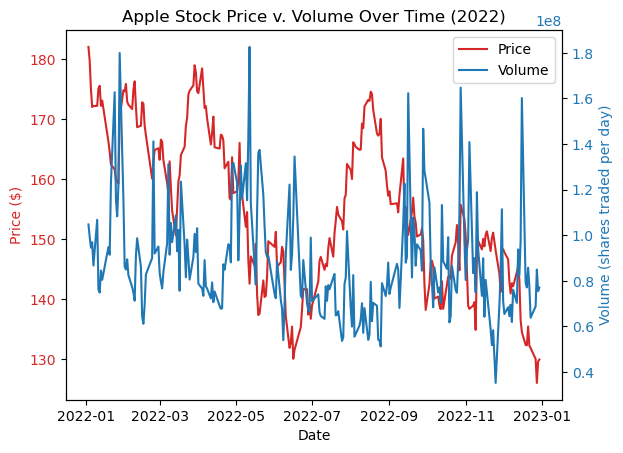

In [104]:
apple_df_2022 = apple_df.loc[(apple_df['Date'].dt.year < 2023) & (apple_df['Date'].dt.year > 2021)]

apple_date_2022 = apple_df_2022['Date']
apple_price_2022 = apple_df_2022['Apple_Price']
apple_vol_2022 = apple_df_2022['Apple_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date_2022, apple_price_2022, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date_2022, apple_vol_2022, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Apple Stock Price v. Volume Over Time (2022)')
plt.show()

<Figure size 3000x400 with 0 Axes>

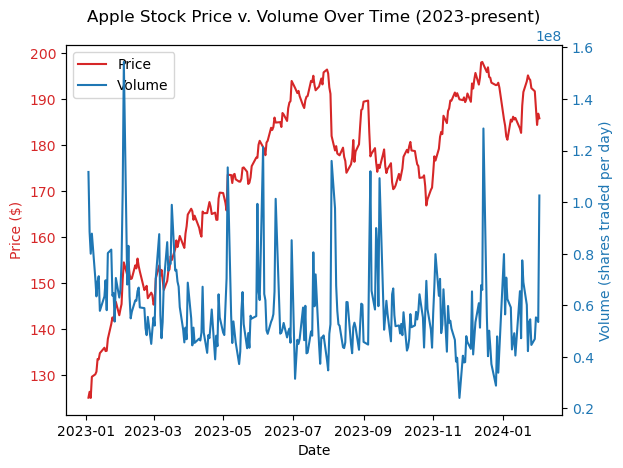

In [106]:
apple_df_2023 = apple_df.loc[apple_df['Date'].dt.year > 2022]

apple_date_2023 = apple_df_2023['Date']
apple_price_2023 = apple_df_2023['Apple_Price']
apple_vol_2023 = apple_df_2023['Apple_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(apple_date_2023, apple_price_2023, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(apple_date_2023, apple_vol_2023, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Apple Stock Price v. Volume Over Time (2023-present)')
plt.show()

# Microsoft Stock Prices/Volume
    2/4/2019 - 2/2/2024

In [51]:
microsoft_df = data.drop(columns= ['?','Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'])

microsoft_df['Microsoft_Price'] = pd.to_numeric(microsoft_df['Microsoft_Price'])
microsoft_df['Microsoft_Vol.'] = pd.to_numeric(microsoft_df['Microsoft_Vol.'])

microsoft_df.head()

,Date,Microsoft_Price,Microsoft_Vol.
0,2024-02-02,411.22,28260000.0
1,2024-02-01,403.78,29230000.0
2,2024-01-31,397.58,46780000.0
3,2024-01-30,408.59,29340000.0
4,2024-01-29,409.72,23290000.0


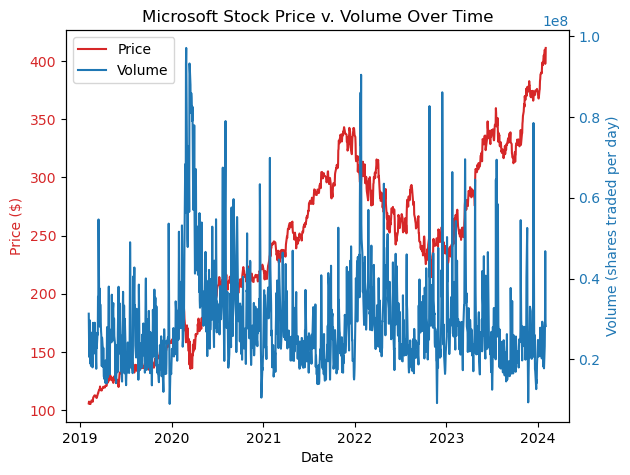

In [52]:
microsoft_date = microsoft_df['Date']
microsoft_price = microsoft_df['Microsoft_Price']
microsoft_vol = microsoft_df['Microsoft_Vol.']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date, microsoft_price, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date, microsoft_vol, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

fig.tight_layout()
plt.title('Microsoft Stock Price v. Volume Over Time')
plt.show()

<Figure size 3000x400 with 0 Axes>

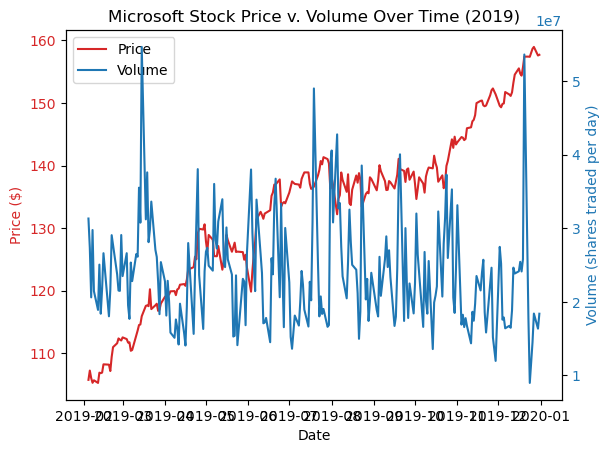

In [108]:
microsoft_df_2019 = microsoft_df.loc[apple_df['Date'].dt.year < 2020]

microsoft_date_2019 = microsoft_df_2019['Date']
microsoft_price_2019 = microsoft_df_2019['Microsoft_Price']
microsoft_vol_2019 = microsoft_df_2019['Microsoft_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date_2019, microsoft_price_2019, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date_2019, microsoft_vol_2019, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Microsoft Stock Price v. Volume Over Time (2019)')
plt.show()

<Figure size 3000x400 with 0 Axes>

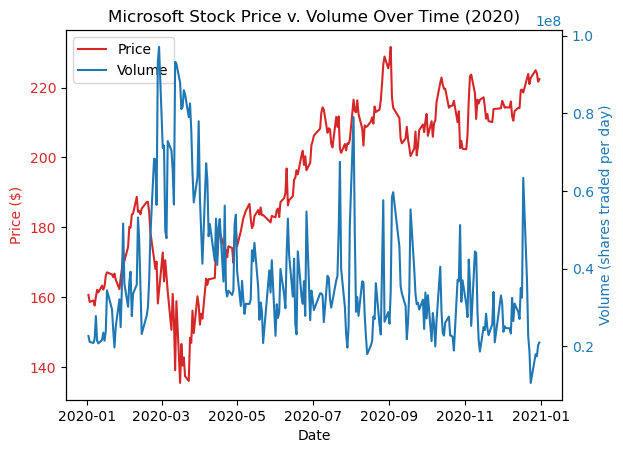

In [109]:
microsoft_df_2020 = microsoft_df.loc[(microsoft_df['Date'].dt.year < 2021) & (microsoft_df['Date'].dt.year > 2019)]

microsoft_date_2020 = microsoft_df_2020['Date']
microsoft_price_2020 = microsoft_df_2020['Microsoft_Price']
microsoft_vol_2020 = microsoft_df_2020['Microsoft_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date_2020, microsoft_price_2020, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date_2020, microsoft_vol_2020, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Microsoft Stock Price v. Volume Over Time (2020)')
plt.show()

<Figure size 3000x400 with 0 Axes>

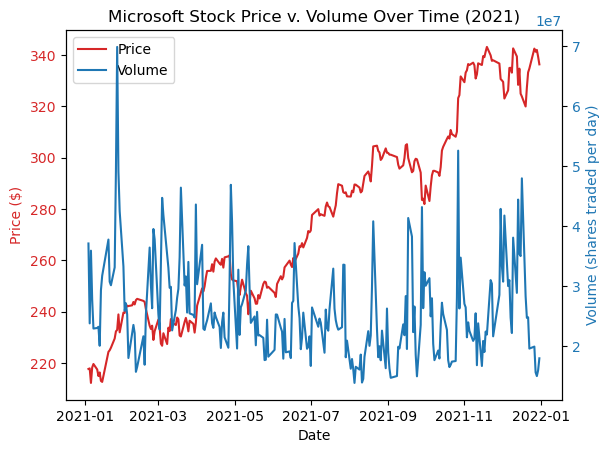

In [110]:
microsoft_df_2021 = microsoft_df.loc[(microsoft_df['Date'].dt.year < 2022) & (microsoft_df['Date'].dt.year > 2020)]

microsoft_date_2021 = microsoft_df_2021['Date']
microsoft_price_2021 = microsoft_df_2021['Microsoft_Price']
microsoft_vol_2021 = microsoft_df_2021['Microsoft_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date_2021, microsoft_price_2021, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date_2021, microsoft_vol_2021, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Microsoft Stock Price v. Volume Over Time (2021)')
plt.show()

<Figure size 3000x400 with 0 Axes>

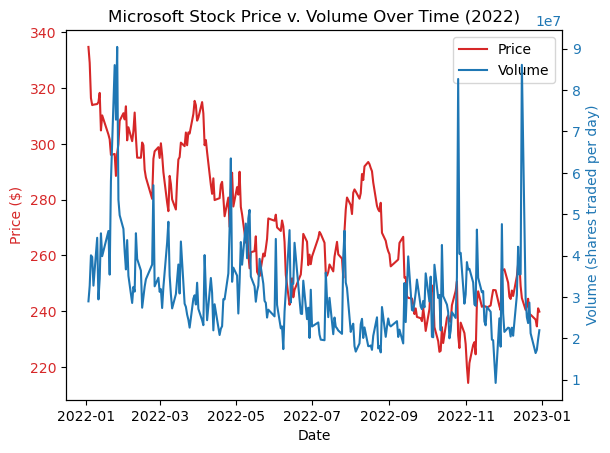

In [111]:
microsoft_df_2022 = microsoft_df.loc[(microsoft_df['Date'].dt.year < 2023) & (microsoft_df['Date'].dt.year > 2021)]

microsoft_date_2022 = microsoft_df_2022['Date']
microsoft_price_2022 = microsoft_df_2022['Microsoft_Price']
microsoft_vol_2022 = microsoft_df_2022['Microsoft_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date_2022, microsoft_price_2022, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date_2022, microsoft_vol_2022, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Microsoft Stock Price v. Volume Over Time (2022)')
plt.show()

<Figure size 3000x400 with 0 Axes>

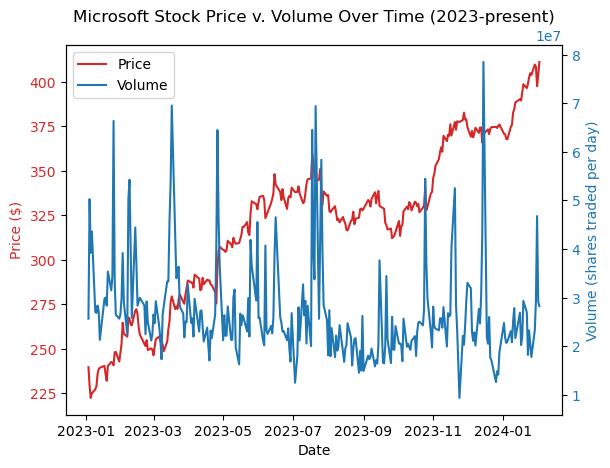

In [112]:
microsoft_df_2023 = microsoft_df.loc[microsoft_df['Date'].dt.year > 2022]

microsoft_date_2023 = microsoft_df_2023['Date']
microsoft_price_2023 = microsoft_df_2023['Microsoft_Price']
microsoft_vol_2023 = microsoft_df_2023['Microsoft_Vol.']

plt.figure(figsize = (30,4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
price_line = ax1.plot(microsoft_date_2023, microsoft_price_2023, color=color, label = 'Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volume (shares traded per day)', color=color)
vol_line = ax2.plot(microsoft_date_2023, microsoft_vol_2023, color=color, label = 'Volume')
ax2.tick_params(axis='y', labelcolor=color)

lines = price_line + vol_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title('Microsoft Stock Price v. Volume Over Time (2023-present)')
plt.show()